In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(context='talk',fscale=1.4, spines=False, gridlines="--",grid=False)

In [2]:
df = pd.read_csv('cleandf.csv')

In [3]:
pd.set_option('display.max_columns', 50)
df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,4.744544,10.578261,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,2.872000,16.9,21.8,0.0,0.0,0,12
1,Albury,7.4,25.1,0.0,5.433669,10.499866,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,2.882759,3.161074,17.2,24.3,0.0,0.0,0,12
2,Albury,12.9,25.7,0.0,5.635524,9.863670,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.987952,2.000000,21.0,23.2,0.0,0.0,0,12
3,Albury,9.2,28.0,0.0,6.469908,10.993803,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,2.304348,2.879310,18.1,26.5,0.0,1.0,0,12
4,Albury,17.5,32.3,1.0,8.320003,9.511982,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121785,Uluru,3.5,21.8,0.0,4.427803,10.065135,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,2.767045,3.304813,9.4,20.9,0.0,0.0,0,6
121786,Uluru,2.8,23.4,0.0,4.894433,10.309648,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,2.713415,3.166667,10.1,22.4,0.0,0.0,0,6
121787,Uluru,3.6,25.3,0.0,5.500261,10.815789,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,2.308824,2.656934,10.9,24.5,0.0,0.0,0,6
121788,Uluru,5.4,26.9,0.0,6.058485,10.309648,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,2.713415,3.166667,12.5,26.1,0.0,0.0,0,6


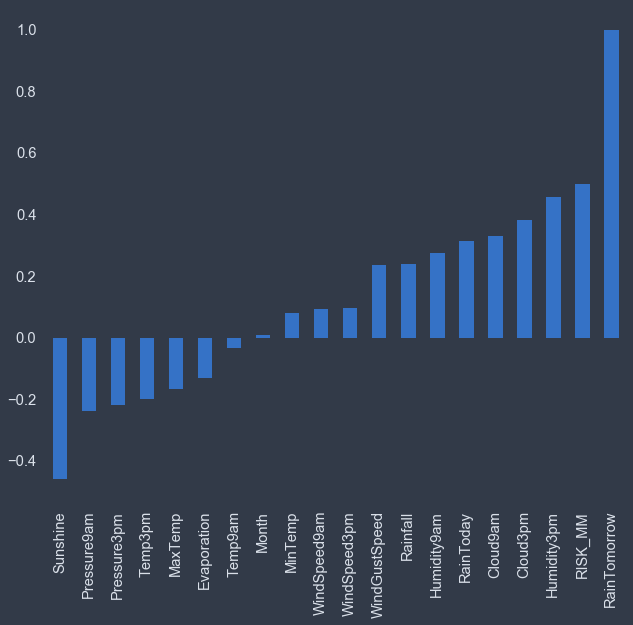

In [4]:
df.corr()['RainTomorrow'].sort_values().plot(kind='bar')

In [5]:
df = df.drop('Month',axis=1)
df = df.drop('Temp9am',axis=1)

In [6]:
from pycaret.classification import *

In [7]:
source=setup(data = df, target = 'RainTomorrow', session_id=101)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,101
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(121790, 22)"
4,Missing Values,False
5,Numeric Features,16
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Random Forest Classifier,1.000000,1.000000,0.999900,1.000000,1.000000,1.000000
2,Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Extreme Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,Light Gradient Boosting Machine,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,Logistic Regression,0.987200,0.998700,0.965500,0.976200,0.970800,0.962600
8,SVM - Linear Kernel,0.960800,0.000000,0.933900,0.906100,0.912900,0.887900
9,Extra Trees Classifier,0.942100,0.988700,0.786500,0.941600,0.857100,0.821200


In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')


In [18]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=41, max_features=90, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')


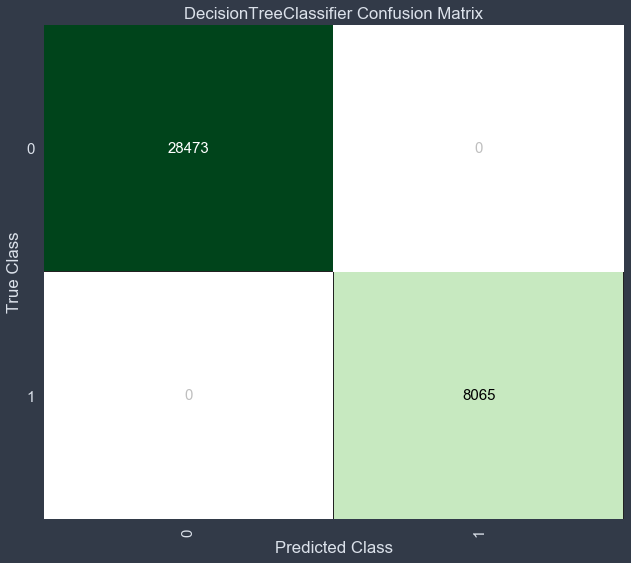

In [38]:
plot_model(tuned_dt, plot='confusion_matrix')

In [36]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_1.0,RainTomorrow,Label,Score
0,24.7,34.0,6.6,9.800000,7.453898,41.0,11.0,15.0,87.0,56.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.0
1,13.5,19.2,4.4,3.743909,7.760201,48.0,24.0,30.0,79.0,53.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0
2,18.9,23.5,0.0,4.400000,8.600000,28.0,13.0,17.0,73.0,73.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.0
3,15.7,32.0,0.0,8.177464,6.973271,41.0,26.0,19.0,37.0,60.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0
4,7.2,16.1,2.0,3.028473,5.935785,20.0,6.0,7.0,96.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36533,21.2,34.2,2.6,9.800000,10.500000,37.0,7.0,11.0,29.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0
36534,0.8,13.7,0.0,2.532379,8.976072,19.0,9.0,7.0,75.0,42.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0
36535,21.5,37.6,0.0,12.200000,11.537500,48.0,7.0,30.0,18.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
36536,17.1,28.9,0.0,7.000000,12.900000,28.0,6.0,11.0,56.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
